# Hit identification - genome-wide CRIPSRa IFNG screen of T cells

In [1]:
import lamindb as ln
import bionty as bt

ln.settings.transform.stem_uid = "PtTXoc0RbOIq"
ln.settings.transform.version = "2"

ln.track()

💡 connected lamindb: laminlabs/lamindata
💡 notebook imports: bionty==0.43.0 lamindb==0.73.1 pandas==2.0.0
💡 loaded: Transform(uid='PtTXoc0RbOIq65cN', version='2', name='Hit identification - genome-wide CRIPSRa IFNG screen of T cells', key='4-analyze-assay', type='notebook', created_by_id=2, updated_at='2024-06-17 09:13:21 UTC')
💡 loaded: Run(uid='UPxSzjT73iZhtZLOtZ6l', started_at='2024-06-17 09:14:53 UTC', is_consecutive=True, transform_id=106, created_by_id=2)


Run(uid='UPxSzjT73iZhtZLOtZ6l', started_at='2024-06-17 09:14:53 UTC', is_consecutive=True, transform_id=106, created_by_id=2)

## Download assay readout from wetlab

In [2]:
artifact = ln.Artifact.filter(description="CRIPSRa GWS IFNG readout 2023-08-25.csv").one()

In [3]:
artifact.describe()

Artifact(uid='nqMlYBupxMmpQhuJDPyp', description='CRIPSRa GWS IFNG readout 2023-08-25.csv', suffix='.csv', size=1729685, hash='cUSH0oQ2w-WccO8_ViKRAQ', hash_type='md5', visibility=1, key_is_virtual=False, updated_at='2024-04-29 15:11:39 UTC')
  Provenance
    .created_by = 'sunnyosun'
    .storage = 's3://lamindata'
    .transform = 'Upload GWS CRISPRa result'
    .run = '2023-08-25 21:23:03 UTC'
    .input_of = ["'2023-08-25 23:10:13 UTC'"]



## Load in the assay data and perform analysis

In [4]:
df_raw = artifact.load()

## Perform analysis and ingest results into LaminDB

Let's assume we performed analysis from raw data `df_raw`, now we generated two new data objects:
- df: a new df containing lots of columns of statistics.
- hits: a subsetted dataframe containing hits of the screen.

In [5]:
df = df_raw.set_index("id")
df.head()

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
MAP4K1,12,5.286000e-24,2.615000e-07,0.000081,1,11,-2.8128,1.0,1.0,1.0,18914,0,-2.8128
SLA2,12,5.725000e-20,2.615000e-07,0.000081,2,12,-2.3390,1.0,1.0,1.0,18930,0,-2.3390
MUC1,12,2.467000e-16,2.615000e-07,0.000081,3,12,-2.1793,1.0,1.0,1.0,18919,0,-2.1793
JMJD1C,12,4.316200e-16,2.615000e-07,0.000081,4,12,-2.1524,1.0,1.0,1.0,18923,0,-2.1524
LAT2,12,1.438200e-15,2.615000e-07,0.000081,5,12,-2.6588,1.0,1.0,1.0,18922,0,-2.6588


In [6]:
hits_df = df[df["pos|fdr"] < 0.01].copy()

## Register the file of screen hits

In [7]:
artifact_hits = ln.Artifact.from_df(hits_df, description="hits from schmidt22 crispra GWS")

In [8]:
artifact_hits.save()

... uploading V01p43DuAnerlhiVAXmW.parquet: 100.0%


Artifact(uid='V01p43DuAnerlhiVAXmW', description='hits from schmidt22 crispra GWS', suffix='.parquet', accessor='DataFrame', size=18368, hash='txyBucy8ZdQ42HR76PRPtA', hash_type='md5', visibility=1, key_is_virtual=True, created_by_id=2, storage_id=2, transform_id=106, run_id=218, updated_at='2024-06-17 09:16:00 UTC')

In [9]:
efo = bt.ExperimentalFactor.lookup()
features = ln.Feature.lookup()

artifact_hits.labels.add(efo.grna_seq, features.assay)
artifact_hits.labels.add(efo.interferon_gamma, features.readout)

In [10]:
is_experiment = ln.ULabel.filter(name="is_experiment").one()
is_biosample = ln.ULabel.filter(name="is_biosample").one()

exp1 = is_experiment.children.filter(description__contains="Genome-wide").one()
biosample = is_biosample.children.get(name="S001")

artifact_hits.labels.add(exp1, features.experiment)
artifact_hits.labels.add(biosample, features.biosample)

In [11]:
artifact_hits.describe()

Artifact(uid='V01p43DuAnerlhiVAXmW', description='hits from schmidt22 crispra GWS', suffix='.parquet', accessor='DataFrame', size=18368, hash='txyBucy8ZdQ42HR76PRPtA', hash_type='md5', visibility=1, key_is_virtual=True, updated_at='2024-06-17 09:16:00 UTC')
  Provenance
    .created_by = 'sunnyosun'
    .storage = 's3://lamindata'
    .transform = 'Hit identification - genome-wide CRIPSRa IFNG screen of T cells'
    .run = '2024-06-17 09:13:22 UTC'
  Labels
    .experimental_factors = 'gRNA-seq', 'interferon gamma'
    .ulabels = 'EXP001', 'S001'
  Features
    'experiment' = 'EXP001'
    'biosample' = 'S001'
    'assay' = 'gRNA-seq'
    'readout' = 'interferon gamma'



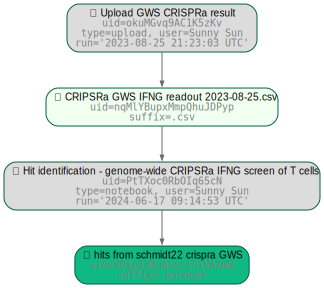

In [12]:
artifact_hits.view_lineage()